# Python Final Assignment  

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# Importing the libraries
import pandas as pd
import re #Has some great tools to clean text
import nltk #Library that contains a lot of different tools to perform NLP
#nltk.download('stopwords')


In [30]:
from textblob import TextBlob


### Hipothesys 

The polarity is affecting the subjectivity of the customers 

### Dataset

In [15]:
dataset = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')
dataset

Review  Liked
0    "I also had to taste my Mom's multi-grain pump...      1
1            "I'd rather eat airline food, seriously."      0
2        Cant say enough good things about this place.      1
3                         The ambiance was incredible.      1
4            The waitress and manager are so friendly.      1
..                                                 ...    ...
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

[500 rows x 2 columns]

### EDA

There are equal likes and dislike

In [18]:
display(likes)

1    250
0    250
Name: Liked, dtype: int64

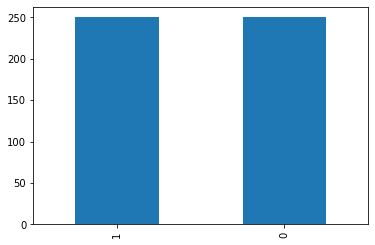

In [17]:
likes = dataset.Liked.value_counts()
likes.plot(kind="bar")

### Cleaning text for a better EDA

In [165]:
# Cleaning the texts

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    #review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [166]:
corpus_df = pd.DataFrame(corpus, columns=['review'])
corpus_df

review
0    i also had to taste my mom s multi grain pumpk...
1                i d rather eat airline food seriously
2         cant say enough good things about this place
3                          the ambiance was incredible
4             the waitress and manager are so friendly
..                                                 ...
495  worse of all he humiliated his worker right in...
496                      conclusion very filling meals
497  their daily specials are always a hit with my ...
498  the pancake was also really good and pretty la...
499  this was my first crawfish experience and it w...

[500 rows x 1 columns]

#### Creating a sentimental analysis

The next analysis tell you how polarized are the opinions and how subjective are.
Polarity is a number from -1 to 1, being the most negative apreciation -1 and the most positive 1 
Subjetive is a number from 0 to 1. 

In [134]:
pol=[]
sent=[]

for i in dataset.iloc[:,0]:
    testimonial = TextBlob(i)
    sent.append(testimonial.sentiment.subjectivity)
    pol.append(testimonial.sentiment.polarity)
    
 

In [135]:
sent_df=pd.DataFrame(sent,columns=['subjectivity'])
pol_df=pd.DataFrame(pol,columns=['polarity'])
sentimental =  pd.concat([pol_df, sent_df,corpus_df,dataset.iloc[:,1]],axis=1)

In [136]:
sentimental.head()

polarity  subjectivity                                             review  \
0  0.466667      0.766667  also tast mom multi grain pumpkin pancak pecan...   
1 -0.333333      0.666667                     rather eat airlin food serious   
2  0.350000      0.550000                   cant say enough good thing place   
3  0.900000      0.900000                                     ambianc incred   
4  0.375000      0.500000                            waitress manag friendli   

   Liked  
0      1  
1      0  
2      1  
3      1  
4      1

#### Comment:
The mean of the polarity is positive (0.150190), it might be better but it means that it can improve  a lot.
The subjectivity is around (0.526246). It means we can not trust in each of the reviewers. 

In [137]:
sentimental.describe()

polarity  subjectivity       Liked
count  500.000000    500.000000  500.000000
mean     0.150190      0.526246    0.500000
std      0.482580      0.341970    0.500501
min     -1.000000      0.000000    0.000000
25%     -0.019844      0.250000    0.000000
50%      0.056250      0.600000    0.500000
75%      0.500000      0.780000    1.000000
max      1.000000      1.000000    1.000000

#### Comment:

The polarity seems to be not much variance and outliers. It means almost all reviewrs have an avarage apreciation of the restobar, no good no bad neither. 
The variance of the subjectivity is higher but the subjetivity is  lower than 0.8 in the 75% of the reviews. 

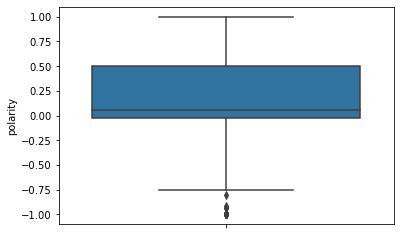

In [138]:
sns.boxplot(y='polarity',data=sentimental)

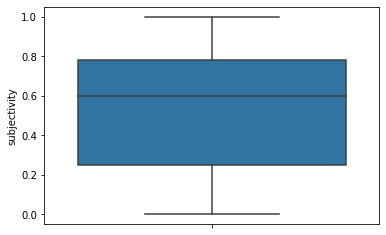

In [139]:
sns.boxplot(y='subjectivity',data=sentimental)

#### Comment:
As we can not trust on the complete reviews. It is better get the concrete ones filtering by subjectivity less than 0.4. Then we classify the positive ones and the negative ones. 

In [142]:
less_sub = sentimental[sentimental['subjectivity']< 0.4]

neg_po = less_sub[less_sub['polarity'] < 0.150190]

pos_po = less_sub[less_sub['polarity'] > 0.150190]


In [143]:
neg_po.describe()


polarity  subjectivity       Liked
count  137.000000    137.000000  137.000000
mean    -0.016231      0.060125    0.321168
std      0.088103      0.114484    0.468639
min     -0.500000      0.000000    0.000000
25%      0.000000      0.000000    0.000000
50%      0.000000      0.000000    0.000000
75%      0.000000      0.100000    1.000000
max      0.150000      0.400000    1.000000

In [144]:
pos_po.describe()

polarity  subjectivity      Liked
count  24.000000     24.000000  24.000000
mean    0.465394      0.314104   0.666667
std     0.298193      0.054243   0.481543
min     0.183333      0.183333   0.000000
25%     0.250000      0.300000   0.000000
50%     0.350000      0.300000   1.000000
75%     0.531250      0.352083   1.000000
max     1.000000      0.394444   1.000000

#### Comment:

Now we can see that only the 14.9% are positive reviews but they have a very high mean (0.465394). 
Besides the negative ones have a very low negative mean (-0.016231) with a very low variance(0.088103).


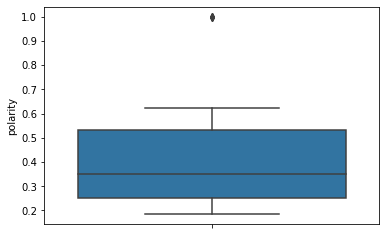

In [145]:
sns.boxplot(y='polarity',data=pos_po)

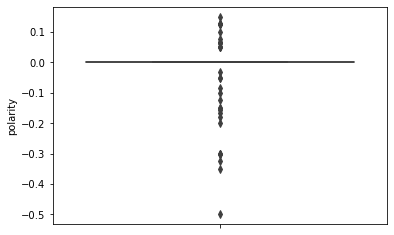

In [146]:
sns.boxplot(y='polarity',data=neg_po)

## Regression

In [211]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 800) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = dataset.iloc[:, 1].values #Defining our response variable


In [103]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23279 sha256=93e2c74386d9790f742cf90daf554df04bf1e9061012b46bff4ceacf6d23fc67
  Stored in directory: C:\Users\jose.gonzalez1\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [212]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)



[[32 18]
 [ 8 42]]
[[37 13]
 [12 38]]


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.742
Logistic: ROC AUC=0.836


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0   2.000000e+00  0.00  0.00
1   1.000000e+00  0.82  0.36
2   1.000000e+00  0.84  0.36
3   4.574792e-12  0.84  0.44
4   9.162665e-13  0.86  0.44
5   1.164906e-20  0.86  0.48
6   4.134455e-25  0.90  0.48
7   1.529337e-30  0.90  0.54
8   1.608924e-37  0.92  0.54
9   1.932448e-59  0.92  0.60
10  0.000000e+00  1.00  1.00

threshold   tpr   fpr
0    1.998852  0.00  0.00
1    0.998852  0.02  0.00
2    0.987478  0.06  0.00
3    0.974189  0.06  0.02
4    0.934815  0.14  0.02
5    0.920864  0.14  0.04
6    0.824825  0.40  0.04
7    0.824553  0.40  0.06
8    0.817965  0.42  0.06
9    0.811649  0.42  0.08
10   0.761079  0.60  0.08
11   0.746631  0.60  0.10
12   0.730628  0.62  0.10
13   0.729466  0.62  0.12
14   0.705150  0.68  0.12
15   0.592799  0.68  0.20
16   0.583208  0.70  0.20
17   0.557576  0.70  0.22
18   0.530933  0.74  0.22
19   0.521951  0.74  0.24
20   0.519723  0.76  0.24
21   0.510018  0.76  0.26
22   0.478292  0.80  0.26
23   0.469740  0.80  0.30
24   0.458205  0.84  0.30
25   0.434342  0.84  0.36
26   0.396634  0.92  0.36
27   0.385292  0.92  0.42
28   0.369704  0.94  0.42
29   0.312404  0.94  0.60
30   0.306223  0.96  0.60
31   0.132594  0.96  0.90
32   0.129056  0.98  0.90
33   0.029472  0.98  1.00
34   0.021461  1.00  1.00

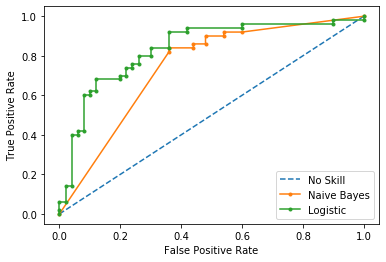

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.92
NB Specificity: 0.45999999999999996
LR Sensitivity: 0.94
LR Specificity: 0.5800000000000001
NB Sensitivity: 0.84
NB Specificity: 0.64
LR Sensitivity: 0.76
LR Specificity: 0.74
NB Sensitivity: 0.84
NB Specificity: 0.64
LR Sensitivity: 0.6
LR Specificity: 0.92
NB Sensitivity: 0.84
NB Specificity: 0.64


In [213]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

#### Comment 

There are two models developed. The first one is the Bayesian model that have an accuracy of 74% but an AUC of 0.742. It means is a good model.
The other model is a logistic regression that have obtained 75% of accuracy and an AUC of 0.836. It means it is the best model to predict if the clients like or dislike.  


### recommendation

The recommendation is that the owner have to improve the way to compile the reviews. It could be done by a proper survey with concrete questions. It could help with the messurement.
The less subjetive people is more negative, it could be because the human behaviour is more of this way when they have bad experiences. 
In general the avarage of the polarity seems to be not much high. But the variance reflex that the avarage is very influenced by  the negative reviews. Otherwise The most of the distribution is close to the postive commentaries. 

The owner should keep more attention to the negative ones. 